# Nifty 50（インド株）週足 メディアン統計

In [1]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'NSEI'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-28 00:00:00+05:30,17181.849609,17703.699219,17003.900391,17670.449219,1566200,0.0,0.0
2022-04-04 00:00:00+05:30,17809.099609,18114.650391,17600.550781,17784.349609,1541000,0.0,0.0
2022-04-11 00:00:00+05:30,17740.900391,17779.050781,17442.349609,17475.650391,762800,0.0,0.0
2022-04-18 00:00:00+05:30,17183.449219,17414.699219,16824.699219,17171.949219,1611500,0.0,0.0
2022-04-25 00:00:00+05:30,17009.050781,17377.650391,16888.699219,17102.550781,1451000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00+05:30,22609.349609,22668.050781,22104.849609,22124.699219,1305100,0.0,0.0
2025-03-03 00:00:00+05:30,22194.550781,22633.800781,21964.599609,22552.500000,1503500,0.0,0.0
2025-03-10 00:00:00+05:30,22521.849609,22676.750000,22314.699219,22397.199219,1299000,0.0,0.0


In [3]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-23 00:00:00+05:30,8949.099609,9038.900391,8522.900391,8660.250000,801500,0.0,0.0
2020-03-30 00:00:00+05:30,8385.950195,8678.299805,8055.799805,8083.799805,2509300,0.0,0.0
2020-04-06 00:00:00+05:30,8446.299805,9131.700195,8360.950195,9111.900391,2452800,0.0,0.0
2020-04-13 00:00:00+05:30,9103.950195,9324.000000,8821.900391,9266.750000,2926700,0.0,0.0
2020-04-20 00:00:00+05:30,9390.200195,9390.849609,8909.400391,9154.400391,3442000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-24 00:00:00+05:30,22609.349609,22668.050781,22104.849609,22124.699219,1305100,0.0,0.0
2025-03-03 00:00:00+05:30,22194.550781,22633.800781,21964.599609,22552.500000,1503500,0.0,0.0
2025-03-10 00:00:00+05:30,22521.849609,22676.750000,22314.699219,22397.199219,1299000,0.0,0.0


## Moving Median

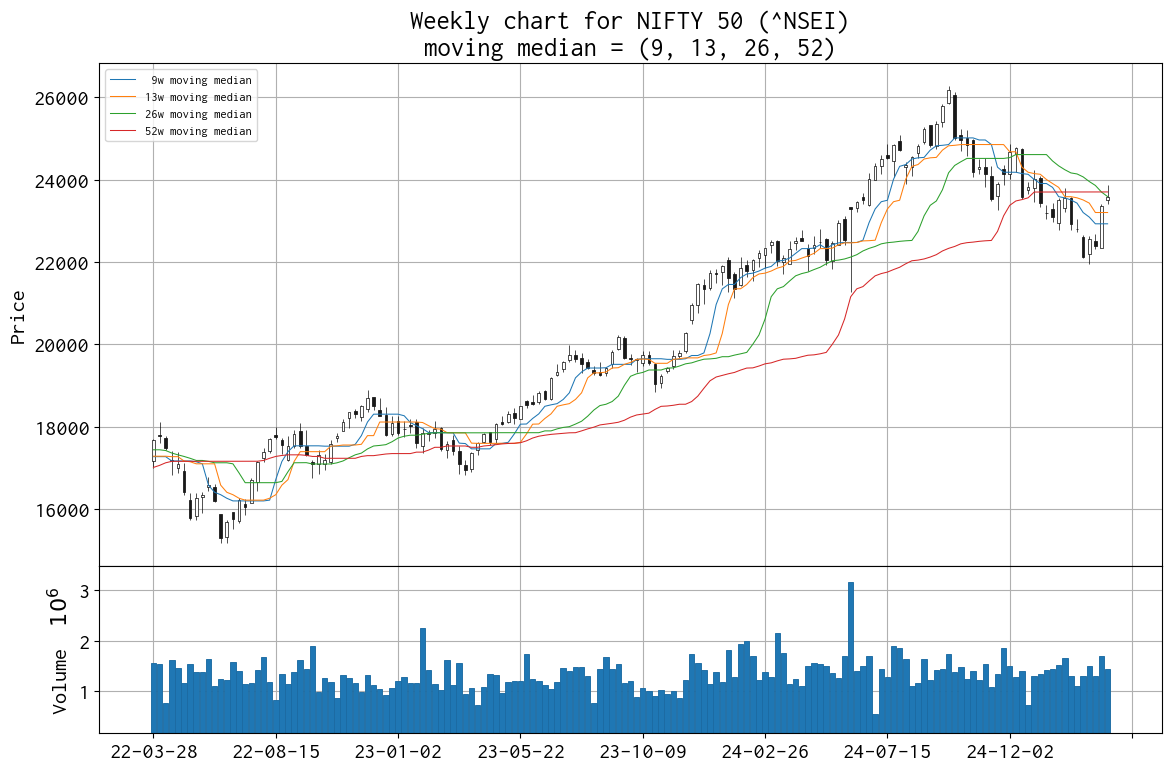

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [5]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-17 00:00:00+05:30,22353.150391,23402.699219,22353.150391,23350.400391,1702400,0.0,0.0
2025-03-24 00:00:00+05:30,23515.400391,23869.599609,23412.199219,23591.949219,1439000,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-03-17 00:00:00+05:30    23350.400391
2025-03-24 00:00:00+05:30    23591.949219
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-03-17 00:00:00+05:30           NaN
2025-03-24 00:00:00+05:30    241.548828
Name: Close, dtype: float64

In [8]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-24 00:00:00+05:30    76.548828
dtype: float64

In [9]:
df['Close'].rolling(9).median().tail()

Date
2025-02-24 00:00:00+05:30    23203.199219
2025-03-03 00:00:00+05:30    23092.199219
2025-03-10 00:00:00+05:30    22929.250000
2025-03-17 00:00:00+05:30    22929.250000
2025-03-24 00:00:00+05:30    22929.250000
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(13).median().tail()

Date
2025-02-24 00:00:00+05:30    23508.400391
2025-03-03 00:00:00+05:30    23431.500000
2025-03-10 00:00:00+05:30    23203.199219
2025-03-17 00:00:00+05:30    23203.199219
2025-03-24 00:00:00+05:30    23203.199219
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).median().tail()

Date
2025-02-24 00:00:00+05:30    24067.924805
2025-03-03 00:00:00+05:30    23956.000000
2025-03-10 00:00:00+05:30    23860.325195
2025-03-17 00:00:00+05:30    23700.450195
2025-03-24 00:00:00+05:30    23589.724609
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(52).median().tail()

Date
2025-02-24 00:00:00+05:30    23700.450195
2025-03-03 00:00:00+05:30    23700.450195
2025-03-10 00:00:00+05:30    23700.450195
2025-03-17 00:00:00+05:30    23700.450195
2025-03-24 00:00:00+05:30    23702.674805
Name: Close, dtype: float64

## Robust Bollinger bands

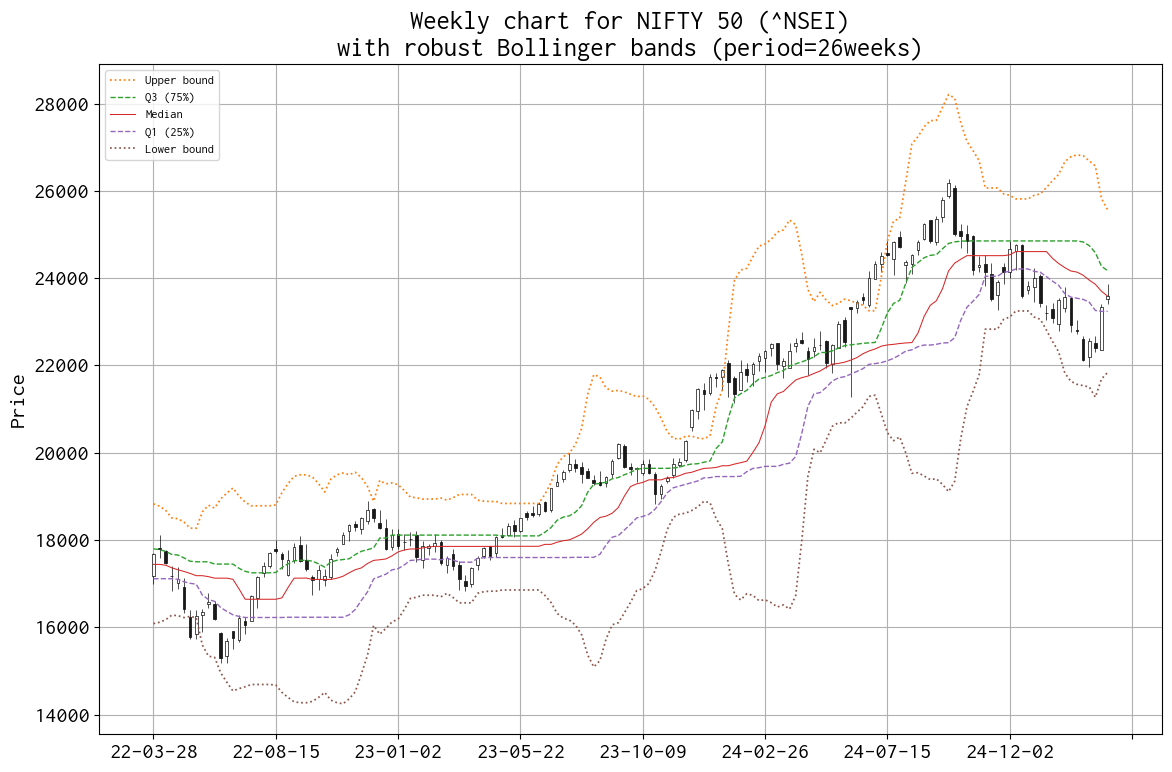

In [13]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

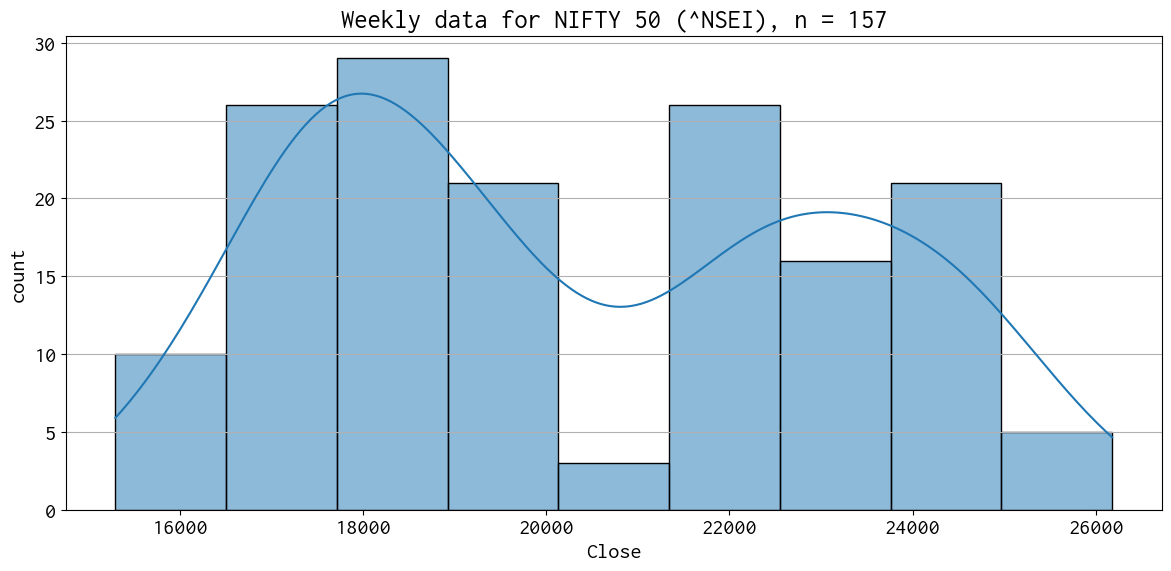

In [14]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()